In [3]:
import numpy as np

import scipy.special as stats 

import matplotlib.pyplot as plt

# Birthday dilemma

## simulation

In [69]:
n_trial = 1000000

In [70]:
arr = np.random.randint(low=0, high=365, size=(18, n_trial))

In [71]:
arr.shape

(18, 1000000)

In [72]:
def find_duplicates(col):
    unique, counts = np.unique(col, return_counts=True)
    unique, counts = unique[counts==2], counts[counts==2]
    #print(unique, counts)
    n_pairs = len(unique)
    return n_pairs

In [73]:
count_pair = []
for idx in range(n_trial):
    n = find_duplicates(arr[:, idx])
    count_pair.append(n)

In [74]:
np.unique(count_pair, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([658171, 288362,  49139,   4140,    183,      5]))

In [75]:
np.exp(np.log(stats.comb(18, 6, exact=True)) + 3 * np.log(1/365) + 66 * np.log(364/365))

0.0003185335876424109

(array([6.533e+03, 2.892e+03, 0.000e+00, 4.840e+02, 0.000e+00, 7.300e+01,
        1.500e+01, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

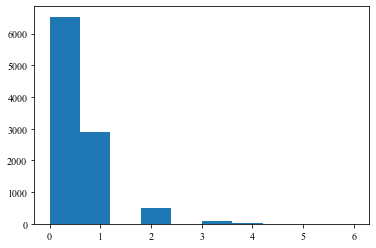

In [31]:
plt.hist(count_pair)

## theory

In [87]:
def calc_prob_density(n_person, n_pair):
    n_comb = 1
    for i in range(n_pair):
        n_comb *= stats.comb(n_person-2*i, 2)
        
    n_comb *= stats.comb(365, n_pair) * stats.perm(365-n_pair, n_person-2*n_pair) 
    
    prob = np.exp(np.log(n_comb) - n_person * np.log(365))
    return prob

In [96]:
def calc_prob(n_person, n_pair):
    probs = [calc_prob_density(n_person, pair) for pair in range(n_pair, n_pair+10)]
    return sum(probs)

In [97]:
calc_prob(18, 3)

<ipython-input-87-43645937264e>:8: RuntimeWarning: divide by zero encountered in log
  prob = np.exp(np.log(n_comb) - n_person * np.log(365))


0.004484533898694855

In [100]:
calc_prob(24, 1)

0.5238634002218893